In [1]:
pip install numpy pandas matplotlib seaborn

PART 1:
imports and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Subtract the mean of each variable
data = np.array([[2, 4, 6, 8, 10],
                 [32, 8, 12, 16, 20],
                 [14, 6, 9, 30, 15],
                 [5, 10, 15, 24, 25],
                 [6, 12, 18, 24, 30]])

mean = np.mean(data, axis=0)
centered_data = data - mean

PART 2:
Calculate the Covariance Matrix

In [4]:
cov_matrix = np.cov(centered_data, rowvar=False)

PART 3:
Compute the Eigenvalues and Eigenvectors

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

PART 4:
Sort Eigenvalues in descending order

In [6]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

PART 5:
Select a subset from the rearranged Eigenvalue matrix

In [7]:
selected_components_2D = eigenvectors[:, :2]
selected_components_3D = eigenvectors[:, :3]

PART 6:
Transform the data

In [8]:
transformed_data_2D = np.dot(centered_data, selected_components_2D)
transformed_data_3D = np.dot(centered_data, selected_components_3D)

PART 7:
Plot the first two components of the transformed data

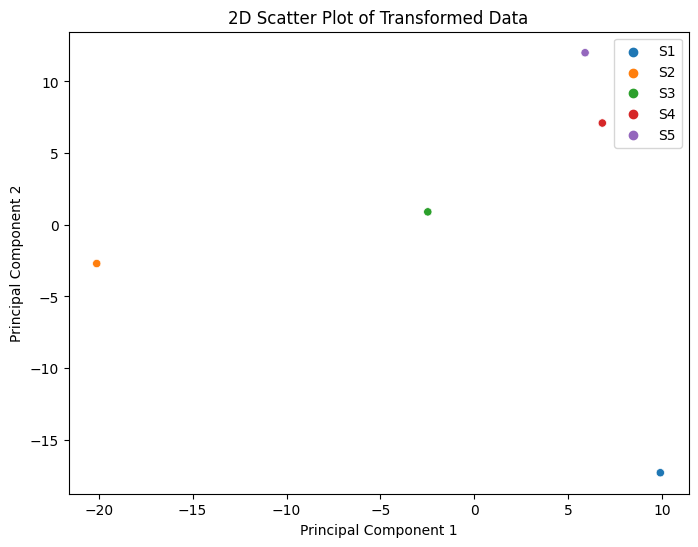

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=transformed_data_2D[:, 0], y=transformed_data_2D[:, 1], hue=df.index)
plt.title('2D Scatter Plot of Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

PART 8:
Plot the first three components of the transformed data

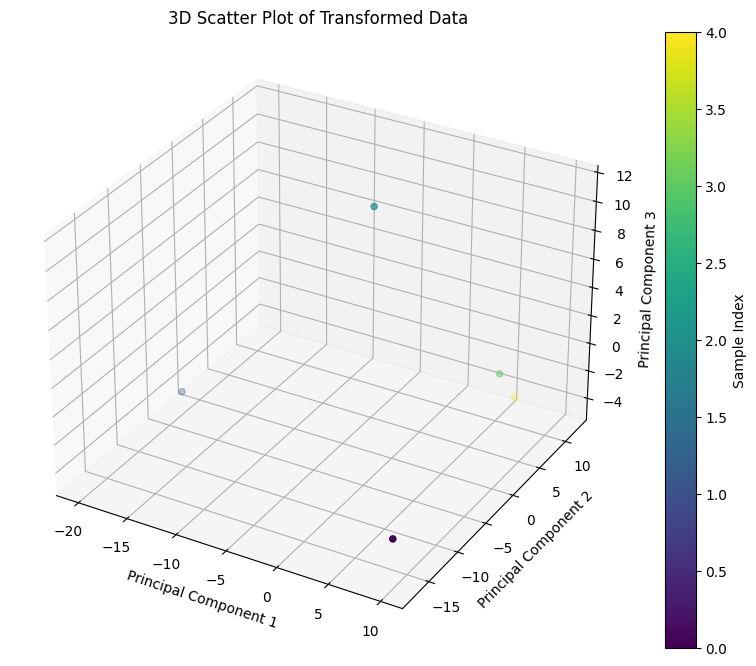

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    transformed_data_3D[:, 0],
    transformed_data_3D[:, 1],
    transformed_data_3D[:, 2],
    c=np.arange(len(df.index)),  # Use numerical values for colors
    cmap='viridis'
)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Sample Index')

ax.set_title('3D Scatter Plot of Transformed Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()